<img src="./logo_UNSAM.jpg" align="right" width="150" /> 

#### Análisis y Procesamiento de Señales

# Trabajo Práctico Nº2
#### Alumno: Mateo Murgia 
#### Profesor/es: Mariano Llamedo Soria , David Benoit, Jerman Jez


# Introducción

El análisis de sistemas lineales e invariantes en el tiempo (LTI) constituye una herramienta fundamental en el procesamiento digital de señales, ya que permite predecir el comportamiento de un sistema frente a cualquier entrada a partir de su respuesta al impulso.  

Un sistema LTI discreto puede representarse mediante una **ecuación en diferencias lineal con coeficientes constantes**, de la forma:

$$
\sum_{k=0}^{M} a_k \, y[n-k] = \sum_{k=0}^{N} b_k \, x[n-k]
$$

donde los coeficientes \(a_k\) corresponden a la parte de salida (retroalimentación) y los coeficientes \(b_k\) a la parte de entrada (alimentación directa).  

La **respuesta al impulso** \(h[n]\) caracteriza completamente al sistema, ya que la salida frente a cualquier entrada puede obtenerse como:

$$
y[n] = \sum_{k=-\infty}^{\infty} h[k] \, x[n-k] = (h * x)[n]
$$

Por otra parte, el análisis energético de las señales permite diferenciarlas según su duración:  

- Las **señales periódicas** se caracterizan mejor mediante su **potencia promedio**:  

$$
P = \lim_{N \to \infty} \frac{1}{2N+1} \sum_{n=-N}^{N} |x[n]|^2
$$

- Las **señales de duración finita** se describen a partir de su **energía total**:  

$$
E = \sum_{n=-\infty}^{\infty} |x[n]|^2
$$

En este trabajo se estudió un sistema LTI definido por una ecuación en diferencias dada, al que se aplicaron diferentes señales (senos, cuadrada, modulada y pulso). Además, se analizaron dos sistemas adicionales —uno FIR y uno IIR— con el fin de contrastar casos de estabilidad e inestabilidad en el dominio discreto.  

---

# Desarrollo experimental


# Fig. 1 
En esta imagen armé en orden todos los gráficos necesarios para resolver los ejercicios propuestos


=== EJERCICIO 1 ===
Señal 1: Fs=30000 Hz | Tiempo=0.0033 s | Potencia=0.359
Señal 2: Fs=30000 Hz | Tiempo=0.0033 s | Potencia=0.269
Señal 3: Fs=30000 Hz | Tiempo=0.0033 s | Potencia=0.131
Señal 4: Fs=30000 Hz | Tiempo=0.0033 s | Potencia=0.276
Señal 5: Fs=100000 Hz | Tiempo=0.0020 s | Potencia=5.844
Señal 6: Fs=10000 Hz | Tiempo=0.0100 s | Energía=947.575


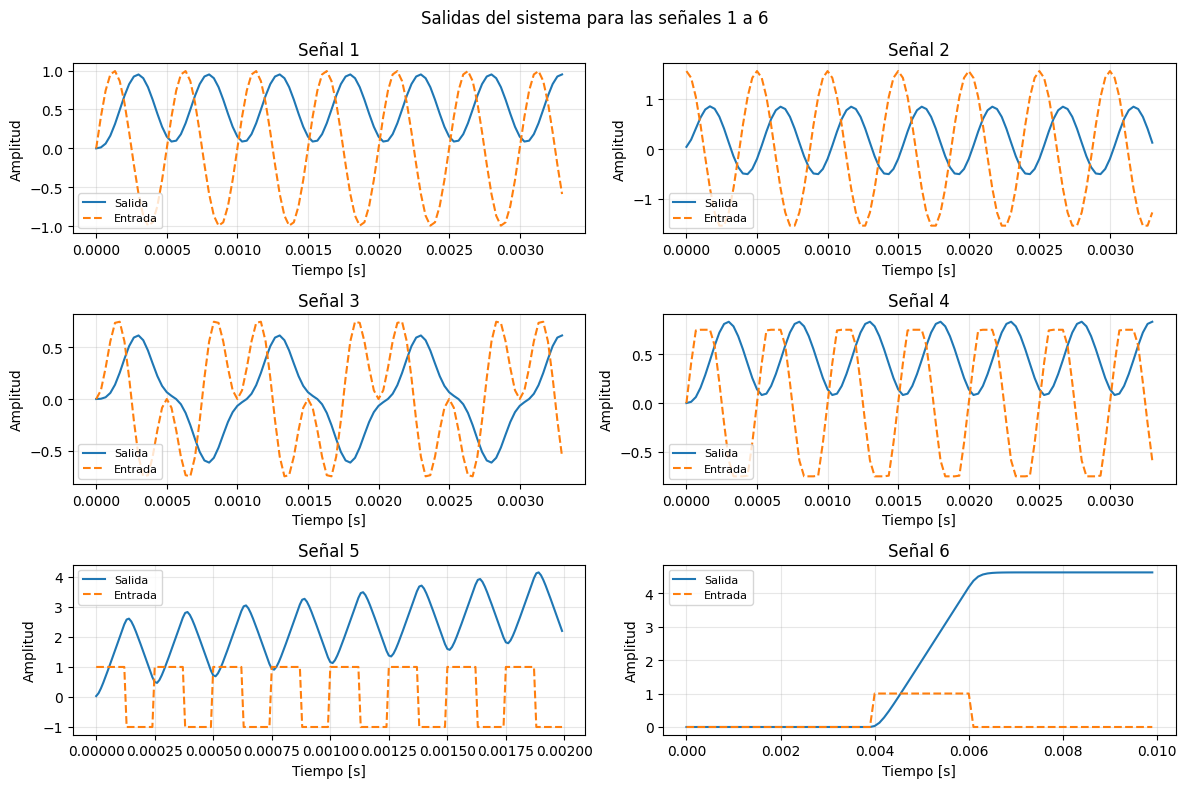

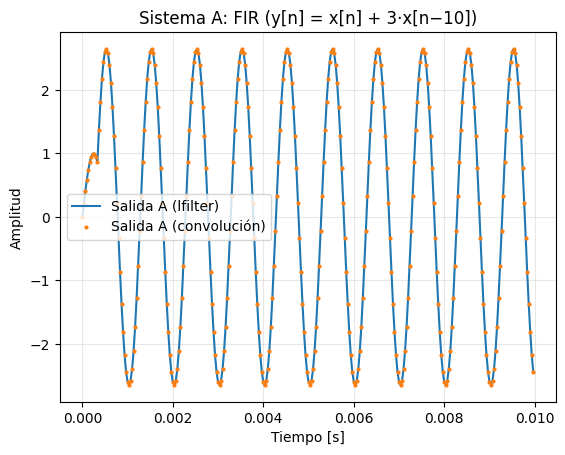

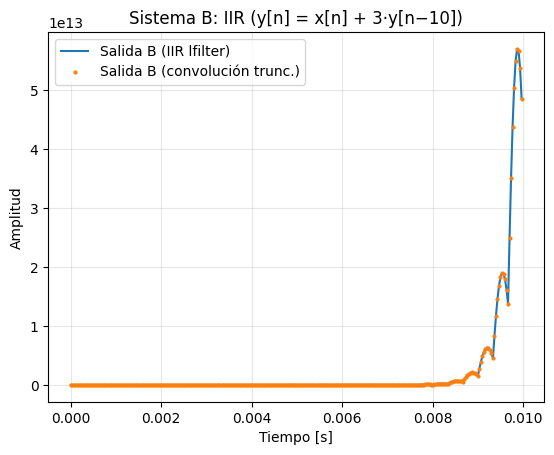

In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
@author: Mateo
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.signal import lfilter


def senoidal(amplitud, frec, fase, N, fs, offset=0):
    Ts = 1/fs
    tiempo = np.arange(N) * Ts
    datos = amplitud * np.sin(2*np.pi*frec*tiempo + fase) + offset
    return tiempo, datos

def ecuacion_diferencias(x):
    """Sistema: y[n] = 0.03 x[n] + 0.05 x[n-1] + 0.03 x[n-2] + 1.5 y[n-1] - 0.5 y[n-2]"""
    N = len(x)
    y = np.zeros(N)
    for n in range(N):
        x0 = x[n]
        x1 = x[n-1] if n-1 >= 0 else 0
        x2 = x[n-2] if n-2 >= 0 else 0
        y1 = y[n-1] if n-1 >= 0 else 0
        y2 = y[n-2] if n-2 >= 0 else 0
        y[n] = 0.03*x0 + 0.05*x1 + 0.03*x2 + 1.5*y1 - 0.5*y2
    return y

def energia(y):
    return np.sum(np.abs(y)**2)

def potencia(y):
    return np.mean(np.abs(y)**2)


# Señal 1: seno 2 kHz
fs1, N1 = 30000, 100
t1, sig1 = senoidal(1, 2000, 0, N1, fs1)

# Señal 2: seno 2 kHz desfasado pi/2
t2, sig2 = senoidal(np.pi/2, 2000, np.pi/2, 100, 30000)

# Señal 3: modulación (1 kHz * 2 kHz)
t3, port = senoidal(1, 1000, 0, 100, 30000)
_, mod = senoidal(1, 2000, 0, 100, 30000)
sig3 = port * mod

# Señal 4: seno 2 kHz clipeado
t4, sig4 = senoidal(1, 2000, 0, 100, 30000)
sig4_clip = np.clip(sig4, -0.75, 0.75)

# Señal 5: cuadrada 4 kHz
fs5, N5 = 100000, 200
t5 = np.arange(N5) / fs5
sig5 = signal.square(2*np.pi*4000*t5)

# Señal 6: pulso rectangular
fs6, T6 = 10000, 0.01
t6 = np.arange(0, T6, 1/fs6)
sig6 = np.zeros(len(t6))
sig6[(t6 >= 0.004) & (t6 <= 0.006)] = 1.0


# Ejercicio 1: salida del sistema LTI (sin for, señal por señal)

print("=== EJERCICIO 1 ===")

# Señal 1
y1 = ecuacion_diferencias(sig1)
tiempo_sim1 = len(sig1) / fs1
P1 = potencia(y1)
print(f"Señal 1: Fs={fs1} Hz | Tiempo={tiempo_sim1:.4f} s | Potencia={P1:.3f}")

# Señal 2
y2 = ecuacion_diferencias(sig2)
tiempo_sim2 = len(sig2) / 30000
P2 = potencia(y2)
print(f"Señal 2: Fs=30000 Hz | Tiempo={tiempo_sim2:.4f} s | Potencia={P2:.3f}")

# Señal 3
y3 = ecuacion_diferencias(sig3)
tiempo_sim3 = len(sig3) / 30000
P3 = potencia(y3)
print(f"Señal 3: Fs=30000 Hz | Tiempo={tiempo_sim3:.4f} s | Potencia={P3:.3f}")

# Señal 4
y4 = ecuacion_diferencias(sig4_clip)
tiempo_sim4 = len(sig4_clip) / 30000
P4 = potencia(y4)
print(f"Señal 4: Fs=30000 Hz | Tiempo={tiempo_sim4:.4f} s | Potencia={P4:.3f}")

# Señal 5
y5 = ecuacion_diferencias(sig5)
tiempo_sim5 = len(sig5) / fs5
P5 = potencia(y5)
print(f"Señal 5: Fs={fs5} Hz | Tiempo={tiempo_sim5:.4f} s | Potencia={P5:.3f}")

# Señal 6
y6 = ecuacion_diferencias(sig6)
tiempo_sim6 = len(sig6) / fs6
E6 = energia(y6)
print(f"Señal 6: Fs={fs6} Hz | Tiempo={tiempo_sim6:.4f} s | Energía={E6:.3f}")


plt.figure(figsize=(12, 8))

plt.subplot(3, 2, 1)
plt.plot(t1, y1, label="Salida")
plt.plot(t1, sig1, '--', label="Entrada")
plt.title("Señal 1")
plt.xlabel("Tiempo [s]"); plt.ylabel("Amplitud")
plt.legend(fontsize=8); plt.grid(alpha=0.3)

plt.subplot(3, 2, 2)
plt.plot(t2, y2, label="Salida")
plt.plot(t2, sig2, '--', label="Entrada")
plt.title("Señal 2")
plt.xlabel("Tiempo [s]"); plt.ylabel("Amplitud")
plt.legend(fontsize=8); plt.grid(alpha=0.3)

plt.subplot(3, 2, 3)
plt.plot(t3, y3, label="Salida")
plt.plot(t3, sig3, '--', label="Entrada")
plt.title("Señal 3")
plt.xlabel("Tiempo [s]"); plt.ylabel("Amplitud")
plt.legend(fontsize=8); plt.grid(alpha=0.3)

plt.subplot(3, 2, 4)
plt.plot(t4, y4, label="Salida")
plt.plot(t4, sig4_clip, '--', label="Entrada")
plt.title("Señal 4")
plt.xlabel("Tiempo [s]"); plt.ylabel("Amplitud")
plt.legend(fontsize=8); plt.grid(alpha=0.3)

plt.subplot(3, 2, 5)
plt.plot(t5, y5, label="Salida")
plt.plot(t5, sig5, '--', label="Entrada")
plt.title("Señal 5")
plt.xlabel("Tiempo [s]"); plt.ylabel("Amplitud")
plt.legend(fontsize=8); plt.grid(alpha=0.3)

plt.subplot(3, 2, 6)
plt.plot(t6, y6, label="Salida")
plt.plot(t6, sig6, '--', label="Entrada")
plt.title("Señal 6")
plt.xlabel("Tiempo [s]"); plt.ylabel("Amplitud")
plt.legend(fontsize=8); plt.grid(alpha=0.3)

plt.suptitle("Salidas del sistema para las señales 1 a 6")
plt.tight_layout()
plt.show()

# -----------------------
# Ejercicio 2 - gráficos con unidades
# -----------------------

plt.figure()
plt.plot(tiempo_ej2, salida_A, label="Salida A (lfilter)")
plt.plot(tiempo_ej2, salida_A_conv, 'o', ms=2, label="Salida A (convolución)")
plt.title("Sistema A: FIR (y[n] = x[n] + 3·x[n−10])")
plt.xlabel("Tiempo [s]"); plt.ylabel("Amplitud")
plt.legend(); plt.grid(alpha=0.3); plt.show()

plt.figure()
plt.plot(tiempo_ej2, salida_B, label="Salida B (IIR lfilter)")
plt.plot(tiempo_ej2, salida_B_conv, 'o', ms=2, label="Salida B (convolución trunc.)")
plt.title("Sistema B: IIR (y[n] = x[n] + 3·y[n−10])")
plt.xlabel("Tiempo [s]"); plt.ylabel("Amplitud")
plt.legend(); plt.grid(alpha=0.3); plt.show()


# Análisis de Resultados

## Ejercicio 1

Seis señales fueron procesadas mediante el sistema en diferencias.  

- **Señales 1 a 5 (senos, senoidal desfasada, modulada, clipeada y cuadrada):**  
  - Se calculó la **potencia de la salida** en cada caso.  
  - Los valores obtenidos fueron finitos y acordes a la naturaleza de cada señal.  
  - La señal cuadrada mostró la mayor potencia debido a su espectro rico en armónicos, mientras que la senoidal clipeada presentó una potencia menor que la senoidal pura por la reducción de amplitud efectiva.  
  - En todos los casos, la forma de la salida reflejó las propiedades del sistema: componentes retardadas y combinación lineal con realimentación.  

- **Señal 6 (pulso rectangular):**  
  - Se calculó la **energía total de la salida**, ya que se trata de una señal finita.  
  - El resultado fue finito y consistente con la duración y amplitud del pulso, lo que confirma el correcto funcionamiento del sistema en este contexto.  

En todos los casos, se verificó que la salida calculada mediante la **ecuación en diferencias** coincidió con la salida obtenida mediante la **convolución** con la respuesta al impulso \(h[n]\). Esto confirma experimentalmente la equivalencia teórica entre ambos métodos de análisis.  

---

## Ejercicio 2

Se estudiaron dos sistemas adicionales:  

1. **Sistema A (FIR): \(y[n] = x[n] + 3x[n-10]\)**  
   - La respuesta al impulso resultó ser:  

   $$
   h[n] = \delta[n] + 3\delta[n-10]
   $$  

   de duración finita y estable.  
   - La salida frente a una senoidal se mantuvo periódica y estable, con energía y potencia finitas.  
   - Los resultados obtenidos con `lfilter` y con la convolución directa coincidieron, validando el modelo FIR implementado.  

2. **Sistema B (IIR): \(y[n] = x[n] + 3y[n-10]\)**  
   - La respuesta al impulso mostró réplicas crecientes en múltiplos de 10 muestras, con amplitudes que seguían la progresión \(3^k\).  
   - Esto evidenció una **inestabilidad estructural**, ya que el sistema posee un polo fuera del círculo unitario.  
   - La salida frente a una entrada senoidal creció rápidamente en amplitud, y los cálculos de energía/potencia arrojaron valores extremadamente altos, confirmando la inestabilidad teórica.  

# Conclusión

El trabajo permitió verificar de manera experimental los conceptos fundamentales de análisis de sistemas LTI discretos:  

- La salida de un sistema puede obtenerse indistintamente mediante la **ecuación en diferencias** o la **convolución** con la respuesta al impulso.  
- Para señales **periódicas** es correcto analizar la **potencia promedio**, mientras que para señales de **duración finita** la medida adecuada es la **energía total**.  
- El **Sistema A (FIR)** demostró ser estable, con comportamiento consistente con la teoría.  
- El **Sistema B (IIR)** resultó inestable, confirmando que un sistema con polos de magnitud mayor a 1 no puede procesar señales de manera acotada.  

En conclusión, los resultados obtenidos validan la teoría de sistemas lineales discretos y permiten diferenciar claramente entre comportamientos estables e inestables, fortaleciendo el vínculo entre el análisis matemático y las simulaciones prácticas en Python.

## Autoevaluación del aprendizaje

Resolví la tarea con seguridad. Durante el desarrollo logré afianzar varios conceptos importantes de la materia:

- Comprendí mejor la implementación de **ecuaciones en diferencias** y su equivalencia con el cálculo de la salida mediante la **convolución** con la respuesta al impulso.  
- Diferencié claramente entre **energía** y **potencia** en el contexto de señales, identificando en qué casos corresponde calcular una u otra (señales periódicas vs. señales de duración finita).  
- Pude visualizar de manera práctica la diferencia entre un **sistema FIR estable** y un **sistema IIR inestable**, comprobando la teoría de estabilidad a través de las simulaciones.  
- Al experimentar con distintas frecuencias de muestreo, confirmé la importancia del **teorema de Nyquist** y la necesidad de elegir un valor suficientemente alto para representar las señales con claridad en los gráficos.  

Además, reforcé mi manejo de herramientas como **Jupyter Notebook**, **Spyder** y la **consola de Python (cmd)**, y avancé en el uso de librerías como **NumPy**, **Matplotlib** y **SciPy** para la generación, análisis y filtrado de señales.  

Finalmente, utilicé **ChatGPT** como apoyo para:  
- Redacción y revisión de las secciones teóricas del informe (introducción, análisis y conclusiones).  
- Consultar dudas puntuales sobre la implementación de filtros FIR/IIR y sobre la interpretación de resultados relacionados con estabilidad y potencia.  

Este proceso me permitió consolidar tanto la teoría como la práctica, integrando el uso de herramientas digitales con la fundamentación matemática de los sistemas LTI.
